In [1]:
# JP Morgan - Stock market abbreviation: JPM
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get JP Morgan stock data
JPM_data, metadata=ts.get_daily('JPM',outputsize='full')
JPM_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5228.000000,5228.000000,5228.000000,5228.000000,5.228000e+03
mean,55.792156,56.417878,55.117382,55.769363,2.097949e+07
std,26.318861,26.492836,26.177915,26.325951,1.982354e+07
min,15.350000,16.350000,14.960000,15.450000,7.736000e+05
25%,37.807500,38.277500,37.345000,37.810000,9.570375e+06
50%,45.560000,46.020000,44.990000,45.525000,1.407585e+07
75%,64.020000,64.640000,63.615000,64.122500,2.539035e+07
max,139.900000,141.100000,139.260000,141.090000,2.172942e+08


In [3]:
# Create a csv file of the data
JPM_data.to_csv('JPM_data.csv')

In [4]:
# Sort by date
JPM_data['date'] = JPM_data.index

In [5]:
# Show our data
JPM_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,103.86,106.16,103.5100,103.82,31518607.0,2020-08-11
2020-08-10,100.11,102.04,100.0343,100.64,14989853.0,2020-08-10
2020-08-07,96.93,99.49,96.5600,99.38,14743678.0,2020-08-07
2020-08-06,97.58,98.10,96.5400,97.24,10482062.0,2020-08-06
2020-08-05,95.87,98.47,95.7200,97.21,15349693.0,2020-08-05
...,...,...,...,...,...,...
1999-11-05,86.13,87.38,85.6200,86.25,3433300.0,1999-11-05
1999-11-04,83.88,85.94,83.5000,84.12,3869600.0,1999-11-04
1999-11-03,83.62,84.00,82.1900,82.44,2648800.0,1999-11-03


In [6]:
# Read in our stock market data to use for training
JPM_training_complete = pd.read_csv('//project_3/JPM_data.csv')

In [7]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
JPM_training_processed = JPM_training_complete.iloc[:, 1:2].values

In [8]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

JPM_training_scaled = scaler.fit_transform(JPM_training_processed)

In [9]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 5228):
    features_set.append(JPM_training_scaled[i-60:i, 0])
    labels.append(JPM_training_scaled[i, 0])

In [10]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Instantiate the sequential class
model = Sequential()

In [14]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [16]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [18]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5167 samples
Epoch 1/100
5167/5167 [==============================] - 27s 5ms/sample - loss: 0.0065
Epoch 2/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 0.0022
Epoch 3/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 0.0019
Epoch 4/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 0.0020
Epoch 5/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 0.0015
Epoch 6/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 0.0014
Epoch 7/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 0.0014
Epoch 8/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 0.0013
Epoch 9/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 0.0013
Epoch 10/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 0.0012
Epoch 11/100


Epoch 87/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.3354e-04
Epoch 88/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.7809e-04
Epoch 89/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.5284e-04
Epoch 90/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.4077e-04
Epoch 91/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 5.3205e-04
Epoch 92/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.6314e-04
Epoch 93/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.2333e-04
Epoch 94/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.3275e-04
Epoch 95/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.7303e-04
Epoch 96/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 4.5066e-04
Epoch 97/100
5167/5167 [==============================] - 24s 5ms/sample - loss:

In [20]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
JPM_data2, metadata=ts.get_daily('JPM',outputsize='compact')
JPM_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,95.367600,96.904454,93.597143,95.108400,2.349657e+07
std,6.090526,5.788604,5.935080,5.929404,8.418410e+06
min,82.680000,83.750000,78.090000,79.030000,1.048206e+07
25%,91.292500,92.872500,90.080000,91.045000,1.657058e+07
50%,95.000000,96.840000,93.590000,95.525000,2.232525e+07
75%,98.742500,100.057500,97.277500,98.360000,2.822802e+07
max,114.930000,115.770000,111.940000,113.450000,4.609360e+07


In [21]:
JPM_data2.to_csv('JPM_data2.csv')

In [22]:
JPM_data2['date'] = JPM_data2.index

In [23]:
JPM_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,103.86,106.16,103.5100,103.82,31518607.0,2020-08-11
2020-08-10,100.11,102.04,100.0343,100.64,14989853.0,2020-08-10
2020-08-07,96.93,99.49,96.5600,99.38,14743678.0,2020-08-07
2020-08-06,97.58,98.10,96.5400,97.24,10482062.0,2020-08-06
2020-08-05,95.87,98.47,95.7200,97.21,15349693.0,2020-08-05
...,...,...,...,...,...,...
2020-03-26,94.08,98.57,93.5400,98.12,29820200.0,2020-03-26
2020-03-25,89.24,95.15,84.5400,91.73,38035300.0,2020-03-25
2020-03-24,84.90,90.10,82.9000,88.43,34300300.0,2020-03-24


In [24]:
# Read in our testing data
JPM_testing_complete = pd.read_csv('//project_3/JPM_data2.csv')
JPM_testing_processed = JPM_testing_complete.iloc[:, 1:2].values

In [25]:
# Concatenate our training data and testing data
JPM_total = pd.concat((JPM_training_complete['1. open'], JPM_testing_complete['1. open']), axis=0)

In [26]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = JPM_total[len(JPM_total) - len(JPM_testing_complete) - 60:].values

In [27]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [28]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [29]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [30]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [31]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

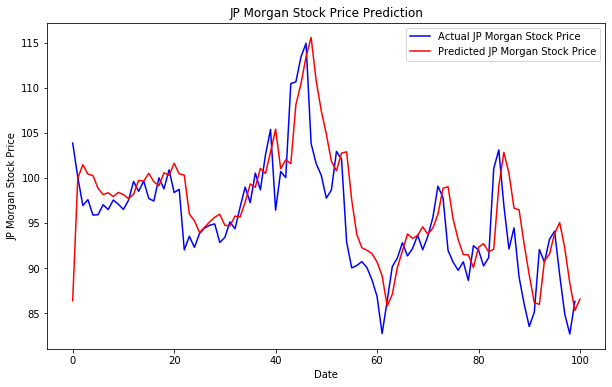

In [32]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(JPM_testing_processed, color='blue', label='Actual JP Morgan Stock Price')
plt.plot(predictions , color='red', label='Predicted JP Morgan Stock Price')
plt.title('JP Morgan Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('JP Morgan Stock Price')
plt.legend()
plt.show()

In [33]:
# Save the model - can be used later
model.save("JP_Morgan_model_trained.h5")